# Actividad Semanal -- 4 PCA
# Alumno: Luis José Navarrete Baduy, Rodrigo López Aguilera
# Matrícula: A01793919, A01793071
# Profesor: Jobish Vallikavungal Devassia
# Fecha: 11 de octubre del 2022

## Parte 1: Ejercicio guiado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

La siguiente celda elimina la columna ID y remueve los registros que tengan las celdas NA

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
df.drop('ID', axis=1, inplace=True)
df.dropna(axis = 0, inplace = True) # remove empty values
df.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0


Se crea una función para poder la correlación de las variables del dataframe

In [3]:
def generateCorrPlot(df: pd.DataFrame):
    plt.figure(figsize=[20,10])
    sns.heatmap(df.corr(), annot=True)
    plt.show()

Se visualiza la correlación de todas las variables en el dataframe original

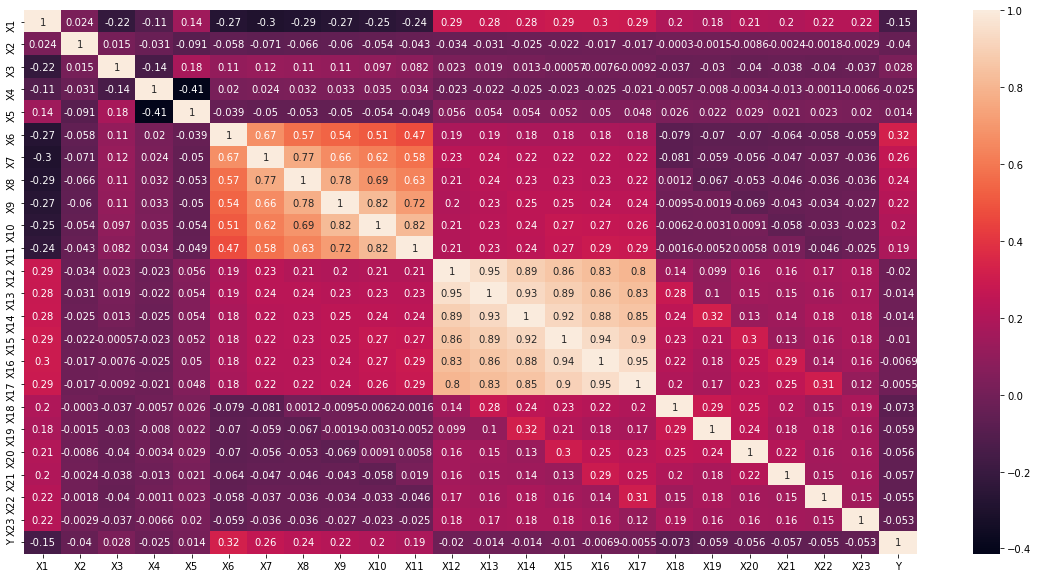

In [5]:
generateCorrPlot(df)

Se defina la función para obtener la varianza total y de cada variable

In [9]:
def getVarianceInfo(data: pd.DataFrame):
    totalVariance = data.var().sum()
    print('Total variance {0}'.format(totalVariance))
    sum_variance = 0
    var, sum_var = list(), list()
    for i in data.columns.values.tolist():
        variance = data[i].var()/totalVariance
        sum_variance += variance
        print(f'Varianza {i}: {((variance)*100).round(2)}%, total: {round(sum_variance*100, 2)}%')
        var.append(((variance)*100).round(2))
        sum_var.append(round(sum_variance*100, 2))
    return var, sum_var

Se eliminar las variables categóricas (cat_columns) y la variable cont_columns contiene las columnas que no sean las de cat_columns

In [10]:
cat_columns = ['X2', 'X3', 'X4', 'Y']
cont_columns = [v for v in df.columns.values.tolist() if v not in (cat_columns)]
print(cont_columns)

['X1', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


Se crea un nuevo dataframe con las columnas presentes en cont_columns

In [11]:
df2 = df[cont_columns].copy()
df2.head()

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Se genera un plot para ver la correlación de las variables continuas en el análisis, se considerarán variables con alto coeficiente de correlación

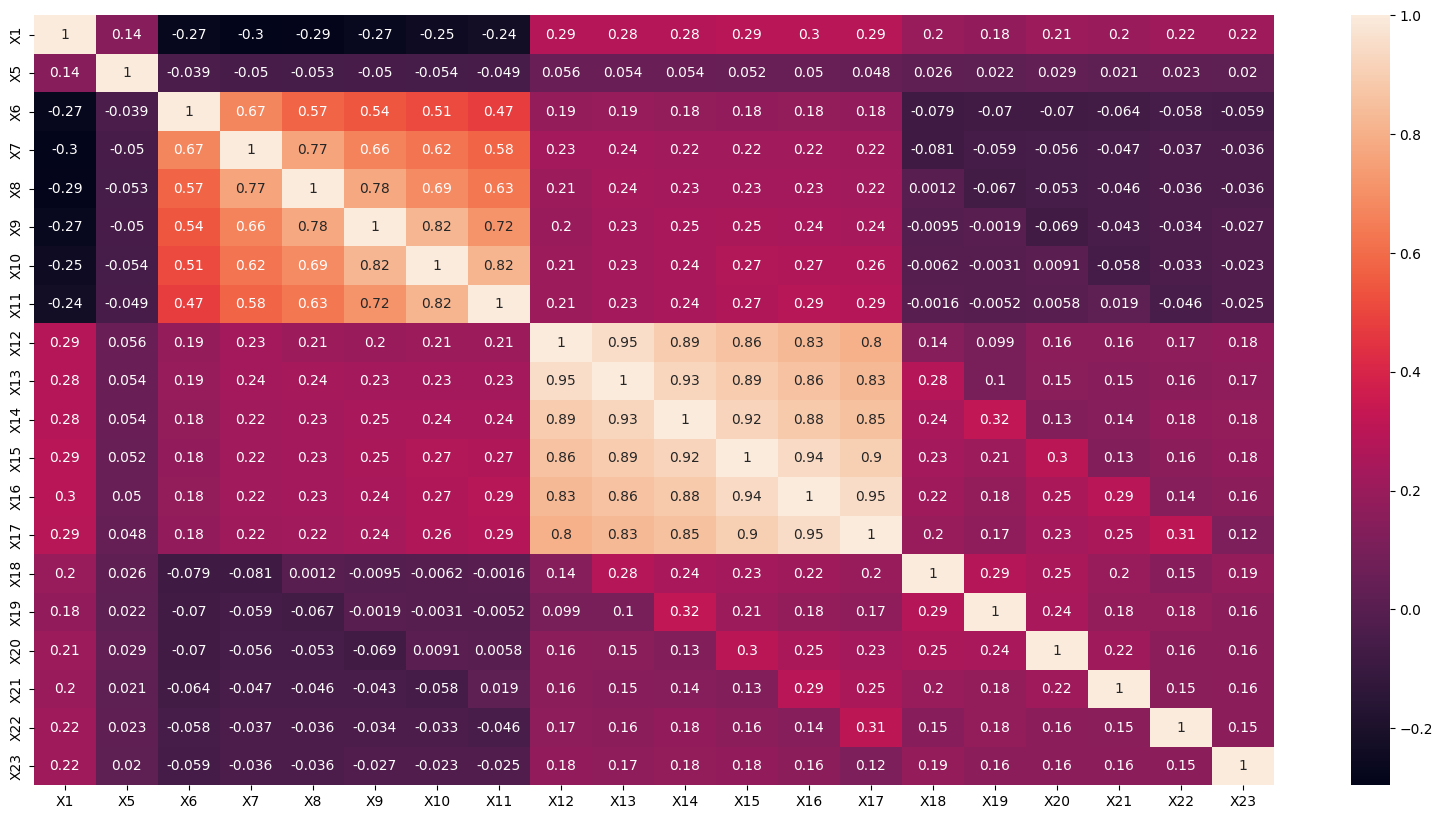

In [12]:
generateCorrPlot(df2)

Se obtiene la varianza de las variables a utilizar, se puede ver que algunas variables tienen una variación muy alta como es el caso de X1, X12 - X17, esto se debe a que los datos son muy grandes por lo que se va a tener que estandarizar el dataframe.

In [14]:
var, cumulative_var = getVarianceInfo(df2)

Total variance 45450192701.38588
Varianza X1: 37.03%, total: 37.03%
Varianza X5: 0.0%, total: 37.03%
Varianza X6: 0.0%, total: 37.03%
Varianza X7: 0.0%, total: 37.03%
Varianza X8: 0.0%, total: 37.03%
Varianza X9: 0.0%, total: 37.03%
Varianza X10: 0.0%, total: 37.03%
Varianza X11: 0.0%, total: 37.03%
Varianza X12: 11.94%, total: 48.98%
Varianza X13: 11.16%, total: 60.13%
Varianza X14: 10.59%, total: 70.73%
Varianza X15: 9.12%, total: 79.84%
Varianza X16: 8.14%, total: 87.98%
Varianza X17: 7.81%, total: 95.79%
Varianza X18: 0.6%, total: 96.4%
Varianza X19: 1.17%, total: 97.57%
Varianza X20: 0.68%, total: 98.25%
Varianza X21: 0.54%, total: 98.79%
Varianza X22: 0.51%, total: 99.3%
Varianza X23: 0.7%, total: 100.0%


Se estandarizan los datos y se crea un nuevo dataframe removiendo la media y volviendo unidad la varianza para que cada variable contribuya de igual manera al análisis.

In [15]:
# Escalando los datos
scaler = StandardScaler()
df3 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
#getVarianceInfo(df3)

In [16]:
var3, cum_var3 = getVarianceInfo(df3)

Total variance 20.000667623593813
Varianza X1: 5.0%, total: 5.0%
Varianza X5: 5.0%, total: 10.0%
Varianza X6: 5.0%, total: 15.0%
Varianza X7: 5.0%, total: 20.0%
Varianza X8: 5.0%, total: 25.0%
Varianza X9: 5.0%, total: 30.0%
Varianza X10: 5.0%, total: 35.0%
Varianza X11: 5.0%, total: 40.0%
Varianza X12: 5.0%, total: 45.0%
Varianza X13: 5.0%, total: 50.0%
Varianza X14: 5.0%, total: 55.0%
Varianza X15: 5.0%, total: 60.0%
Varianza X16: 5.0%, total: 65.0%
Varianza X17: 5.0%, total: 70.0%
Varianza X18: 5.0%, total: 75.0%
Varianza X19: 5.0%, total: 80.0%
Varianza X20: 5.0%, total: 85.0%
Varianza X21: 5.0%, total: 90.0%
Varianza X22: 5.0%, total: 95.0%
Varianza X23: 5.0%, total: 100.0%


Se declara el objeto de PCA y se ajusta con los adtos del dataframe a analizar

In [17]:
pcs = PCA()
components = pcs.fit_transform(df3)
components.shape

(29958, 20)

Se genera un plot para mostrar el porcentaje de varianza de cada componente, se puede ver que con las primeras 10 componentes se obtiene una pérdida de información del 10%.

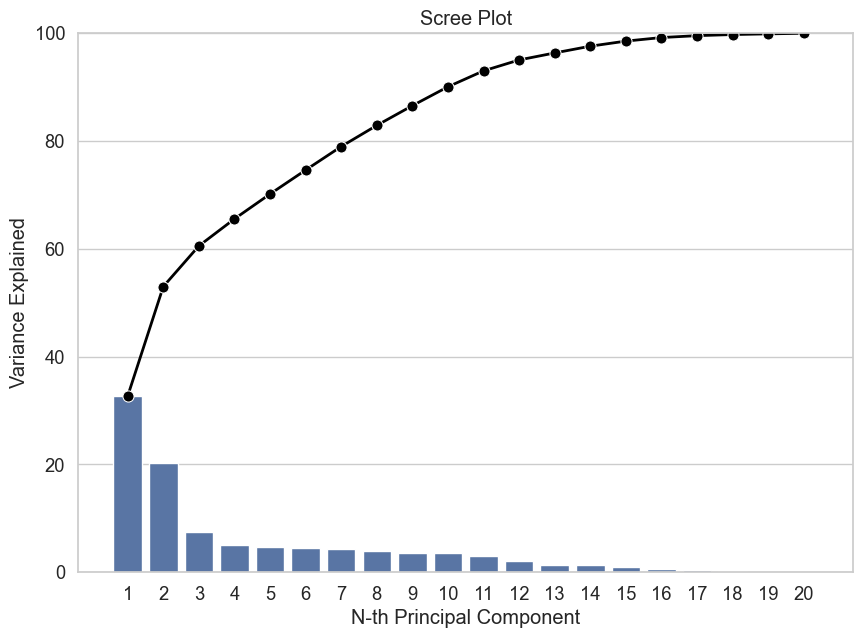

In [18]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_*100, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_)*100, 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 100)
plt.show()

Se conserva la variación total que con los datos escalados, sin embargo los datos se distribuyeron de manera diferente.

In [19]:
pcs_df = pd.DataFrame(components, columns = PC_components)
pca_var, pca_cumulative_var = getVarianceInfo(pcs_df)

Total variance 20.000667623593905
Varianza 1: 32.69%, total: 32.69%
Varianza 2: 20.31%, total: 53.0%
Varianza 3: 7.54%, total: 60.55%
Varianza 4: 5.01%, total: 65.56%
Varianza 5: 4.62%, total: 70.17%
Varianza 6: 4.44%, total: 74.62%
Varianza 7: 4.37%, total: 78.98%
Varianza 8: 3.92%, total: 82.9%
Varianza 9: 3.66%, total: 86.57%
Varianza 10: 3.5%, total: 90.07%
Varianza 11: 2.96%, total: 93.02%
Varianza 12: 2.02%, total: 95.05%
Varianza 13: 1.3%, total: 96.35%
Varianza 14: 1.25%, total: 97.6%
Varianza 15: 0.94%, total: 98.54%
Varianza 16: 0.66%, total: 99.2%
Varianza 17: 0.35%, total: 99.55%
Varianza 18: 0.2%, total: 99.76%
Varianza 19: 0.13%, total: 99.88%
Varianza 20: 0.12%, total: 100.0%


In [20]:
PC_columns = [f'PC{i}' for i in np.arange(pcs.n_components_) + 1]

In [21]:
# df with feature importance
data = pd.DataFrame(pcs.components_, columns=PC_columns, index = df2.columns)
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
X1,0.069780,0.013010,0.160361,0.193241,0.199463,0.206331,0.210280,0.205797,0.334788,0.346225,0.350255,0.354416,0.352316,0.345076,0.094635,0.079045,0.086787,0.078189,0.075728,0.070304
X5,0.313437,0.067907,-0.300810,-0.337739,-0.347033,-0.348043,-0.335178,-0.309409,0.139942,0.140165,0.145988,0.144823,0.142874,0.141030,0.149647,0.140516,0.152156,0.141753,0.137542,0.129720
X6,0.051573,-0.035171,-0.004077,0.044682,0.099677,0.136655,0.155542,0.153558,-0.224208,-0.193869,-0.131320,-0.119253,-0.101026,-0.091300,0.400718,0.437034,0.397246,0.337373,0.263248,0.295544
X7,-0.194615,-0.965201,-0.044294,-0.045093,-0.047251,-0.053572,-0.043100,-0.034091,0.021391,0.033234,0.042314,0.040206,0.040602,0.032776,0.049592,0.053739,0.020522,0.017573,-0.041810,-0.053644
X8,-0.135536,0.131842,-0.088403,-0.107884,-0.051315,-0.005521,0.043093,0.059376,-0.050854,0.019596,0.064205,0.092613,0.063033,-0.059979,0.334374,0.293759,0.238549,-0.099990,-0.689363,-0.416272
X9,-0.011427,0.020011,0.010623,0.006519,-0.023884,-0.044943,-0.013095,0.074924,-0.029990,-0.078866,-0.136241,-0.032545,0.125008,0.149849,-0.253265,-0.242727,0.255378,0.668058,0.080371,-0.533927
X10,-0.063919,0.037795,-0.010361,-0.017485,-0.016868,0.018645,0.015920,-0.036484,-0.050424,-0.041205,0.078675,0.016985,-0.068598,0.099971,0.006037,0.378826,-0.041694,-0.378567,0.578557,-0.585758
X11,0.062766,-0.040502,-0.011895,-0.003078,-0.024327,-0.044296,0.085432,0.032124,0.004863,-0.042245,-0.122907,0.124605,-0.005525,0.013458,-0.239385,-0.272882,0.777448,-0.452963,0.044800,0.085759
X12,0.020745,-0.003634,0.035982,0.022684,-0.107018,-0.001457,0.017791,0.031555,0.008271,-0.134283,0.099592,0.032966,0.047153,-0.006012,-0.729125,0.596687,0.017267,0.074516,-0.186991,0.158559
X13,-0.347981,0.083033,0.565489,0.343608,0.067549,-0.237243,-0.375640,-0.409516,0.068142,0.057156,0.025235,0.000523,-0.029808,-0.042503,0.078267,0.094830,0.182758,0.057580,0.006850,0.037306


In [22]:
data.iloc[:,:10].abs().idxmax() # Variables con mayor importancia en cada componente

PC1     X14
PC2      X7
PC3     X15
PC4     X16
PC5     X18
PC6     X16
PC7     X19
PC8     X16
PC9     X17
PC10    X23
dtype: object

In [23]:
data.iloc[:,:10].abs().idxmin() # Variables con menor importancia en cada componente

PC1     X22
PC2     X15
PC3     X23
PC4     X23
PC5     X23
PC6     X23
PC7     X23
PC8     X22
PC9     X11
PC10    X19
dtype: object

In [24]:
def generatePlot(df:pd.DataFrame):
    plt.rcParams['figure.figsize'] = [25, 50]
    columns = df2.columns.values
    for i in range(len(columns)):
        plt.subplot(6, 4, i+1)
        _ = plt.boxplot(df[columns[i]])
        plt.xlabel(columns[i])
    plt.show()

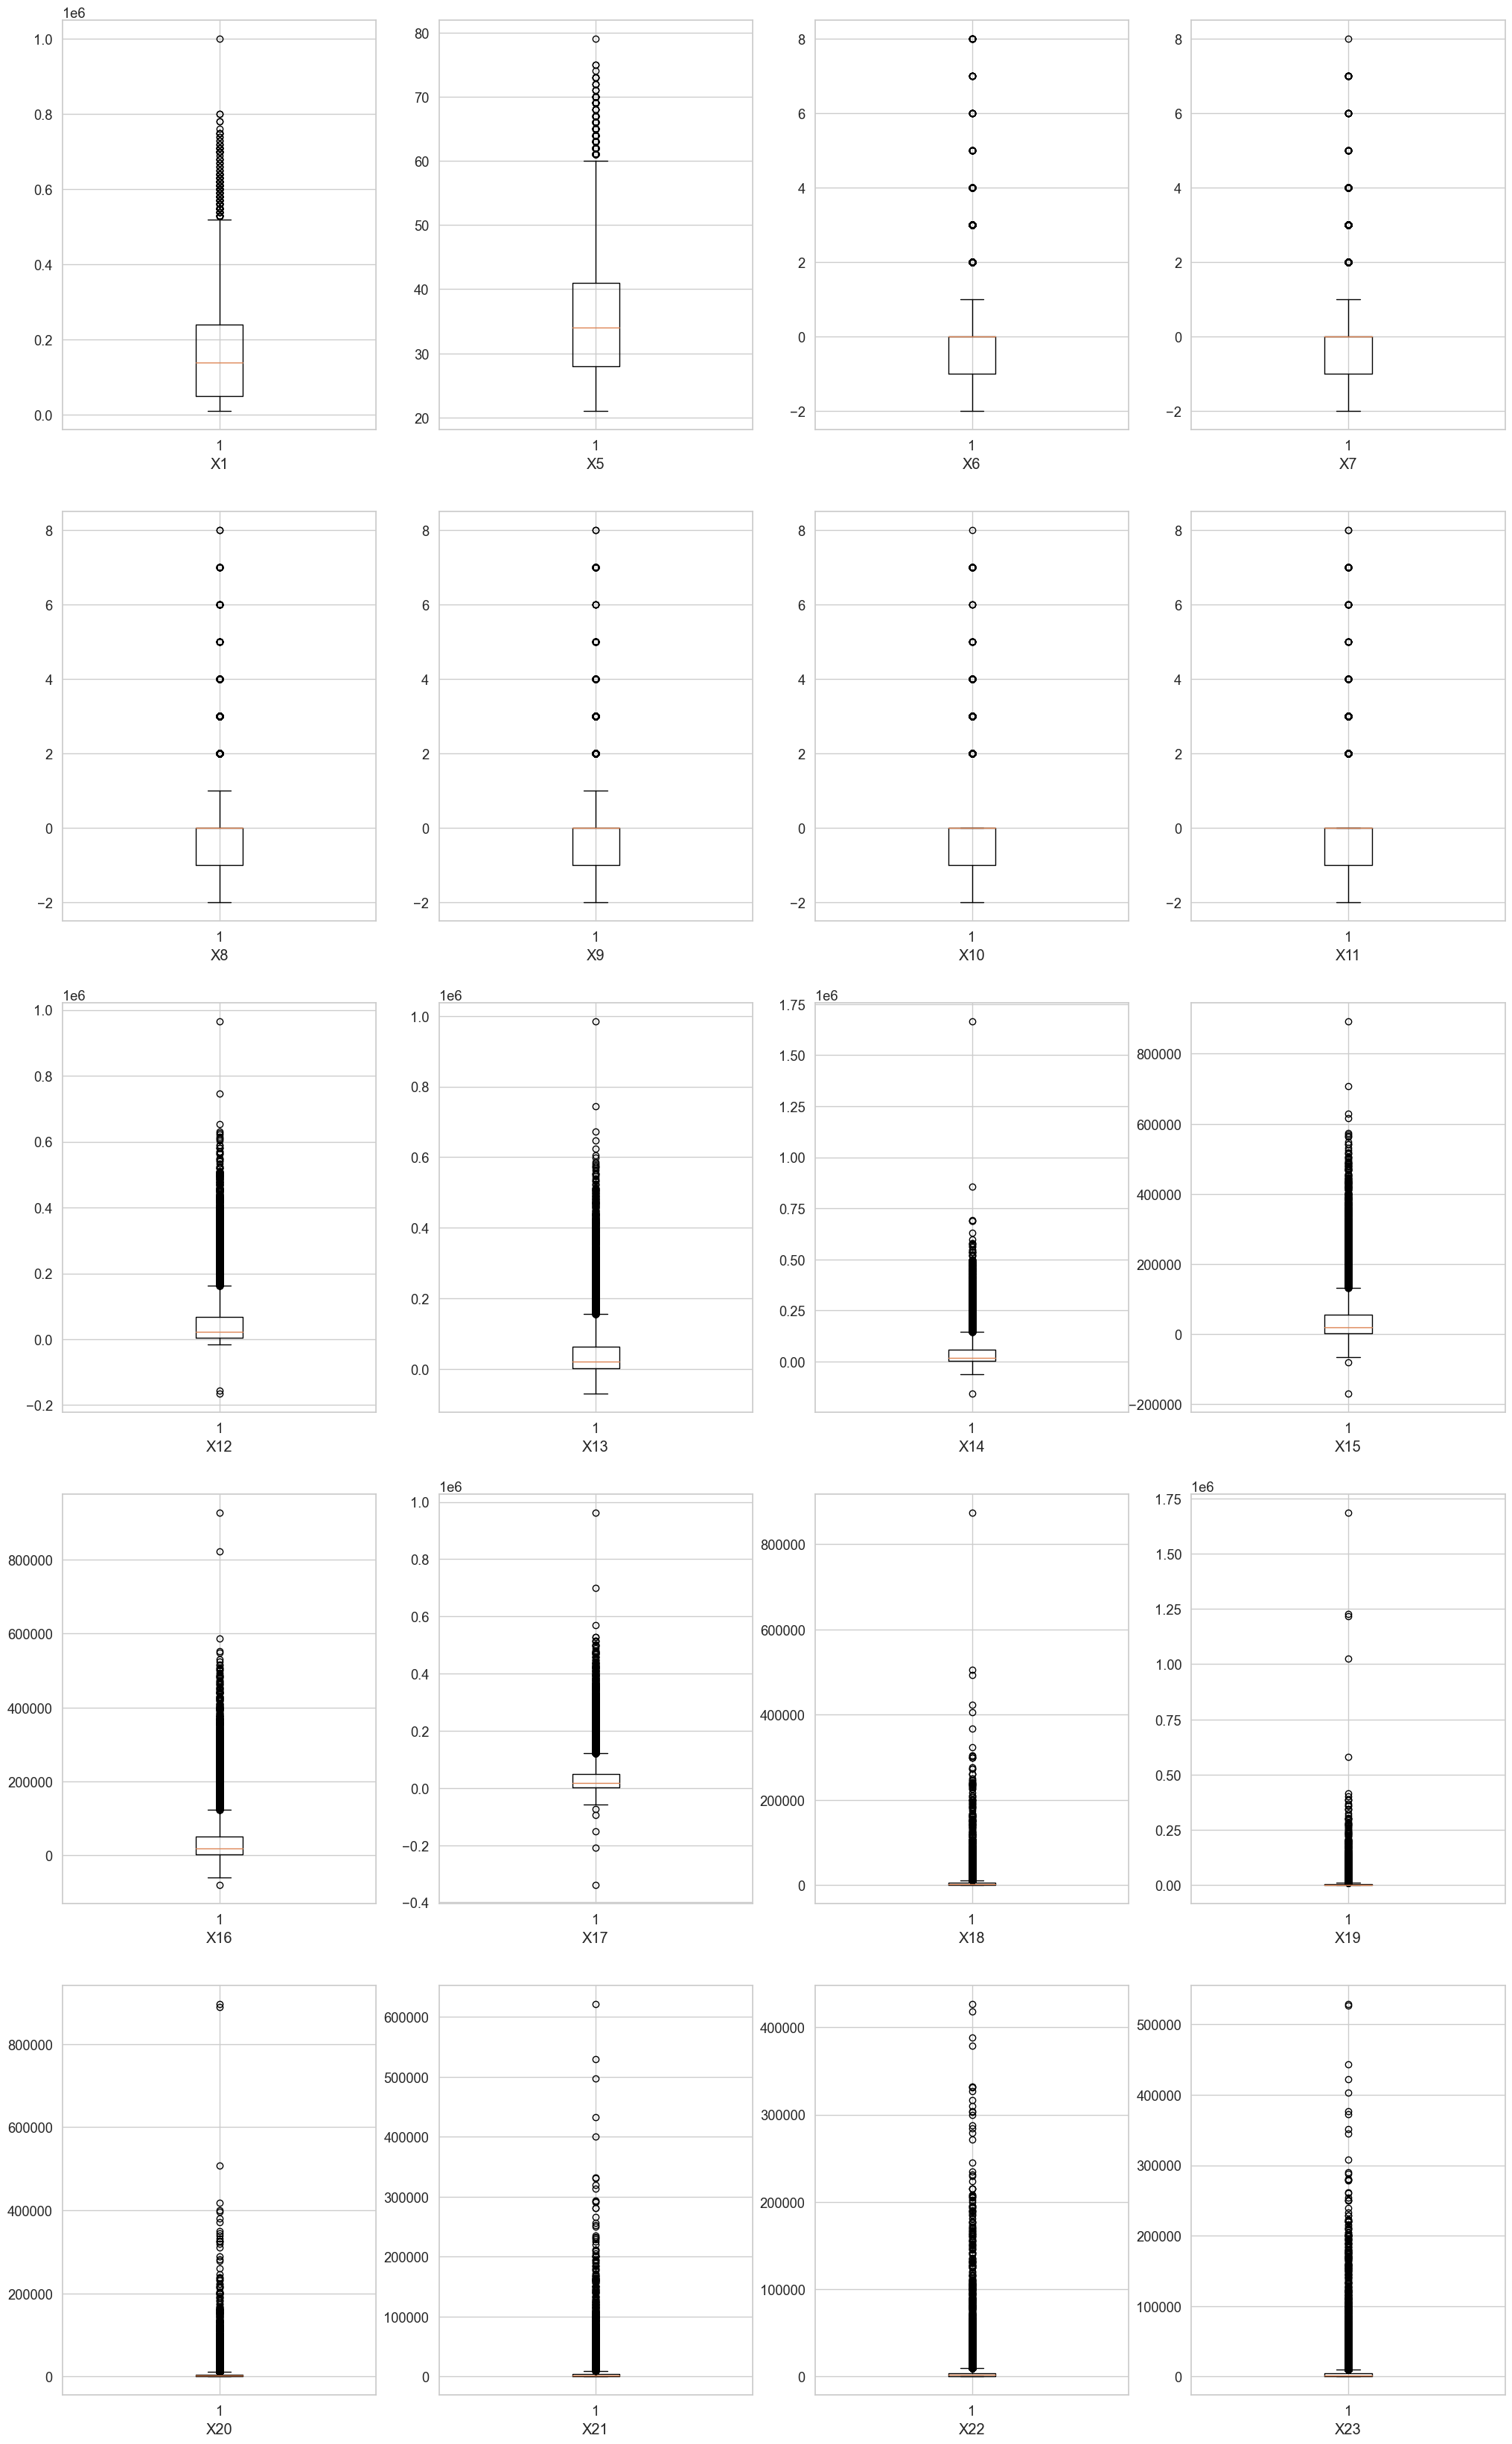

In [25]:
plt.rcParams['figure.figsize'] = [25, 50]
columns = df2.columns.values
for i in range(len(columns)):
    plt.subplot(6, 4, i+1)
    _ = plt.boxplot(df2[columns[i]])
    plt.xlabel(columns[i])
plt.show()

In [30]:
dict = {
    "Variance": var,
    "Cumulative variance": cumulative_var
}
variance_features = df2.columns.values
variance_dataframe = pd.DataFrame(dict, index=variance_features)
variance_dataframe

,Variance,Cumulative variance
X1,37.03,37.03
X5,0.00,37.03
X6,0.00,37.03
X7,0.00,37.03
X8,0.00,37.03
X9,0.00,37.03
X10,0.00,37.03
X11,0.00,37.03
X12,11.94,48.98
X13,11.16,60.13


## Parte 2: Responde las siguientes preguntas

¿Cuál es el número de componentes mínimo y por qué?

Se podría considerar como valor mínimo las primeras 10 componentes porque representan el 90% de los datos originales, a diferencia que de acuerdo a la suma acumulada de la varianza en el dataset original serían las primeras 16 variables para llegar al 90%.

¿Cuál es la variación de los datos que representan esos componentes? 

En la celda anterior se muestra la varianza de cada variable; el aporte total a la varianza. Se observa que la gran variacion de los datos la tiene la primer variable x1, subsecuentemente el otro conjunto de variables que aportan a la varianza total son desde x11 hasta x17. Las siguientes variables pueden ser consideradas tambien en cuanto se cumpla un limite que se defina con anterioridad.

¿Cuál es la pérdida de información después de realizar PCA?

En este caso si se desea utilizar un número específico de componentes como es el caso de las primeras 10 se perdería un 10% de información del dataset, sin embargo, al ir considerando mas componentes se puede evitar la perdida de información pero este no sería la mejor opción porque lo que estamos buscando es reducir las variables tratando de perder la menor cantidad de información.

De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

* PC1 la variable X14 presentó el coeficiente absoluto mas alto, mientras que la variable menos relevante fue X22.
* PC2 la variable X7 presentó el coeficiente absoluto mas alto, mientras que la variable menos relevante fue X15.
* PC3 la variable X15 presentó el coeficiente absoluto mas alto, mientras que la variable menos relevante fue X23.
* PC4 la variable X16 presentó el coeficiente absoluto mas alto, mientras que la variable menos relevante fue X23.
* PC5 la variable X18 presentó el coeficiente absoluto mas alto, mientras que la variable menos relevante fue X23.
* PC6 la variable X16 presentó el coeficiente absoluto mas alto, mientras que la variable menos relevante fue X23.
* PC7 la variable X19 presentó el coeficiente absoluto mas alto, mientras que la variable menos relevante fue X23.
* PC8 la variable X16 presentó el coeficiente absoluto mas alto, mientras que la variable menos relevante fue X22.
* PC9 la variable X17 presentó el coeficiente absoluto mas alto, mientras que la variable menos relevante fue X11.
* PC10 la variable X23 presentó el coeficiente absoluto mas alto, mientras que la variable menos relevante fue X19.

Es importante mencionar que cada componente toma información de todas las variables originales porque eso en algunas componentes se puede observar que la variable menos relevante para el análisis fue X23. En algunos casos puede pasar que una misma variable sea la que más contribuya en varios componentes.

¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

Se recomienda utilizar PCA cuando se están trabajando con una gran cantidad de variables, ya que el objetivo de PCA será encontrar las componentes que explique de mejor manera la información. Otra ventaja es que si algunas variables presentan colinealidad esto se soluciona con los componentes ya que cuando se generen no presentan correlación alguna.

Los benefeficios que tiene para machine learning son:
* Disminuir la complejidad de los modelos.
* Dismuir el tiempo de entrenamiento
* Ayuda a detectar lo mas relevante en una imagen (quita ruido en los datos)
* Se puede utilizar para mejorar el rendimiento de los modelos de aprendizaje automático al ayudar a prevenir el sobreajuste